# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Bias-variance tradeoff
Week 3 | Lesson 2.1



### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Define bias and variance at an intuitive level
- Explain a model's error in terms of bias and variance


### LESSON GUIDE
| TIMING  | TYPE  | TOPIC  |
|:-:|---|---|
| 5 min  | [Introduction](#introduction)   |  The bias-variance tradeoff |
| 20 min  | [Demo ](#demo)  | SSE and bias, variance, and irreducible error  |
| 10 min  | [Stop + jot ](#demo)  | Conceptual and visual demonstration  |
| 45 min  | [Guided Practice](#demo)  | Visualizing bias and variance  |

---


## Quantifying error

We want to minimize the predictive error of our models. (I.e. we need an objective function.) How do we quantify the error in our model?

One metric: Sum of Squared Errors (SSE)

$$ SSE = \sum_{i=1}^{n}(y_i - f(x_i))^2 = \sum_{i=1}^{n}(y_i - \hat y)^2 $$

$x_i$ -- a given x value

$y_i$ -- actual y value

$f(x_i)$-- the model's predicted y value

$\hat y $ -- predicted y value

### SSE can be decomposed<sup>1</sup> into error due to Bias and Variance


$$SSE \sim E(y_i - \hat{f}(x_i))^2 = Var(\hat{f}(x_i))\ + [Bias(\hat{f}(x_i))]^2 + Var(\epsilon)$$

Bias?
*Your model makes assumptions about the shape of the data and consistently gets it wrong as it is run on new sample data.*

Variance?
*Imagine building your model many times, on different slices of data. Variance is related to how much your predictions for a given $x_i$ differ each time you make a prediction*

<sup>1</sup>See the derivation of this result [here](https://theclevermachine.wordpress.com/tag/bias-variance-decomposition/)

### Graphical Representation
Imagine each dart throw is a new prediction *for a single data point $x_i$*.
![](./assets/images/bullseyes.png)

(Image from http://scott.fortmann-roe.com/docs/BiasVariance.html)

**A high-bias model**
![](./assets/images/linear-fit-quadratic.png)

**If we increase the complexity, the bias decreases**
![](./assets/images/quadratic-fit-quadratic.png)

All datasets contain error. Here's a subset of that same data with one error point as an outlier

We can fit a high-degree polynomial to these points to fit the training set perfectly.
![](./assets/images/variance_1.png)

However, when we repeat that model fit on new data, our prediction makes errors. This is error due to variance. 
![](./assets/images/variance_2.png)

## The tradeoff:

![](https://camo.githubusercontent.com/be96d619bff8883343cf541ed1405a8f7f5991cc/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f6d6174682f632f622f632f63626336353331306430396136656661363330643863316633336364666138382e706e67)
![](https://camo.githubusercontent.com/34d8f46b4220c71b359f55db15ed9124474b397d/687474703a2f2f73636f74742e666f72746d616e6e2d726f652e636f6d2f646f63732f646f63732f4269617356617269616e63652f6269617376617269616e63652e706e67)

## Conceptual definition
Take 5 minutes to read the definition of error from "bias" and from "variance" at this link:
http://scott.fortmann-roe.com/docs/BiasVariance.html

Jot down a definition for each in your own words, and draw at least two illustrative models: a high-variance model, and a high-bias model.

### Here's sample code for getting variance and bias from an sklearn model

```python
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(X, Y)

yhat = regr.predict(X)
sse = np.mean((np.mean(yhat) - Y) ** 2)
var = np.var(yhat)
bias = sse - var - 0.01
```

Note that the way this is written implies fitting the model just once; strictly speaking, we conceptualize the bias and variance as calculated by fitting the same model many times on new data. In practice this is hard to compute.

## Guided practice


We've seen that as the complexity in our models change so too do the bias and variance. Let's investigate from another angle using linear regression. Rather than change the model, we'll change the underlying data to be drawn from a higher dimensional model.

We'll investigate fitting functions of the form $f(x) = a + b * x^n$ to some cubic data with noise.


Your tasks are:
* Fill in the code to fit a linear regression to the data
* Investiage the bias and variance as the data source changes in complexity

## Some helper functions
The following functions will generate data and polynomial values.

In [12]:
%matplotlib inline
import random

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn import datasets, linear_model

def polynomials(X, degree=1):
    array = [X]
    y = X
    for i in range(2, int(degree + 1)):
        y = y * X
        array.append(y)
    return np.array(array).transpose()

def monomials(X, degree=1):
    y = np.array(X)
    y = np.power(X, degree)
    return np.array([y]).transpose()

def generate_data(func, a, b, n=100):
    data = []
    for _ in range(n):
        x = random.random() * (b - a)
        y = func(x)
        data.append((x, y))
    return list(sorted(data))

In [9]:
X = np.array(range(10))
polynomials(X, 3)

array([[  0,   0,   0],
       [  1,   1,   1],
       [  2,   4,   8],
       [  3,   9,  27],
       [  4,  16,  64],
       [  5,  25, 125],
       [  6,  36, 216],
       [  7,  49, 343],
       [  8,  64, 512],
       [  9,  81, 729]])

In [10]:
mu, sigma = 0, 0.1 # mean and standard deviation for the random error component
# norm = np.random.normal(mu, sigma)

# Generate some data for the formula below
f = lambda x: 4 + 5 * x - 3 * x*x + 0.1 * x * x * x + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2, n=20)

## Fitting Polynomial Functions

Here we fit try to fit our sample data with an increasing exponent:

$$f(x) = 1 + b x^n$$

None of these models are quite right because the data is generate from the function

$$ \hat{f}(x) = 4 + 5 x - 3 x^2 + 0.1 x^3 + \epsilon$$

So each model is not quite right because one or more terms is missing. This will allow us to take a closer look at the bias-variance tradeoff.

Let's start with $n = 1, 2, 3, 4, ..., 9$.

Coefficients: -0.5234
Variance score: 0.14
Residual sum of squares: 0.54
Bias: 0.456531427932
Variance: 0.0781218193897


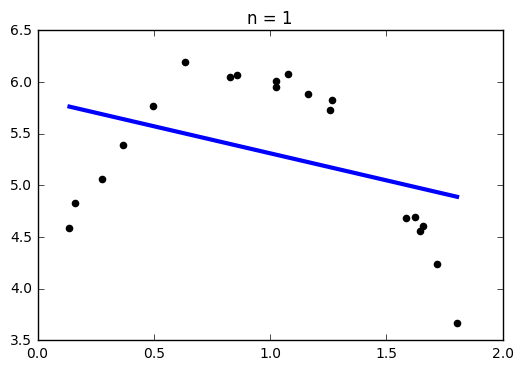

Coefficients: -0.4020
Variance score: 0.34
Residual sum of squares: 0.54
Bias: 0.350304521432
Variance: 0.18434872589


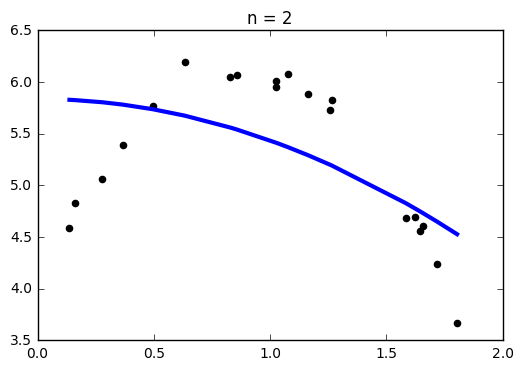

Coefficients: -0.2658
Variance score: 0.48
Residual sum of squares: 0.54
Bias: 0.272140659467
Variance: 0.262512587855


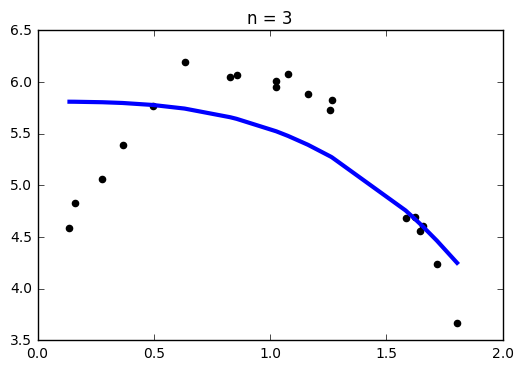

Coefficients: -0.1637
Variance score: 0.57
Residual sum of squares: 0.54
Bias: 0.224319415388
Variance: 0.310333831934


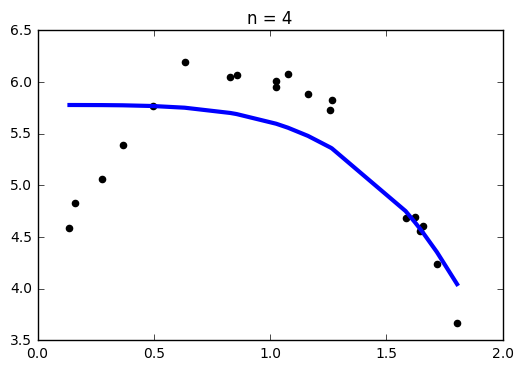

Coefficients: -0.0976
Variance score: 0.62
Residual sum of squares: 0.54
Bias: 0.196479362949
Variance: 0.338173884373


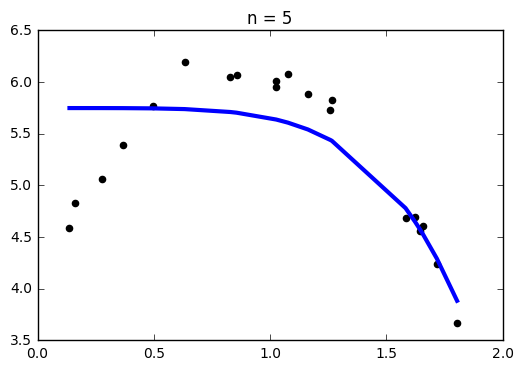

Coefficients: -0.0572
Variance score: 0.65
Residual sum of squares: 0.54
Bias: 0.180935645517
Variance: 0.353717601804


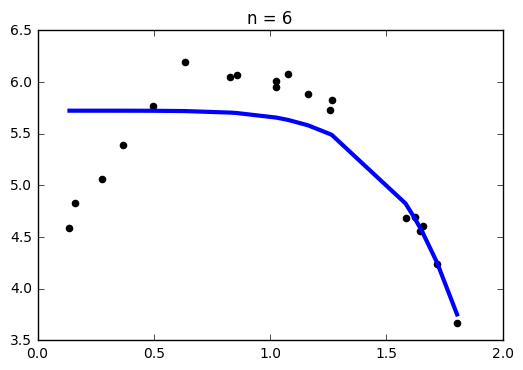

Coefficients: -0.0332
Variance score: 0.66
Residual sum of squares: 0.54
Bias: 0.173191892031
Variance: 0.361461355291


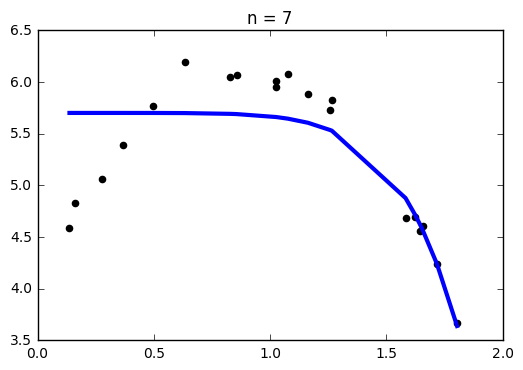

Coefficients: -0.0191
Variance score: 0.67
Residual sum of squares: 0.54
Bias: 0.17067088855
Variance: 0.363982358771


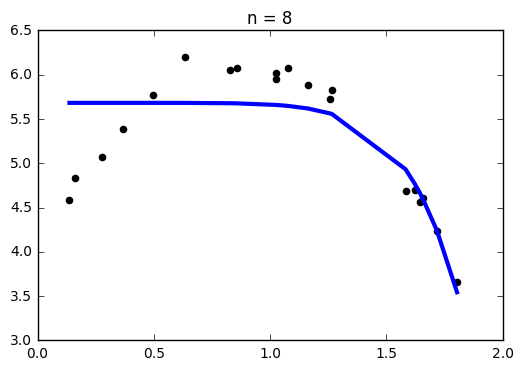

Coefficients: -0.0109
Variance score: 0.67
Residual sum of squares: 0.54
Bias: 0.171826574262
Variance: 0.36282667306


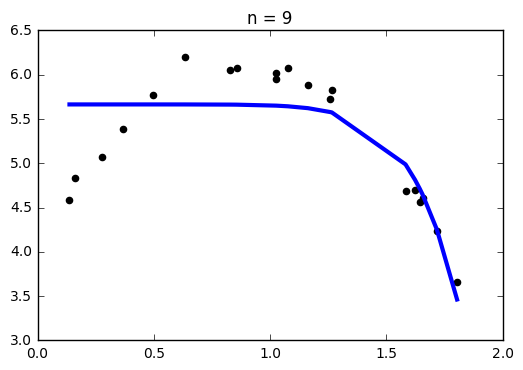

In [15]:
# Lecture code
from sklearn import linear_model
regr = linear_model.LinearRegression()

domain = np.array([x[0] for x in data]) # The x values we're "observing"
Y = np.array([x[1] for x in data]) # The values we are trying to predict


for i in range(1, 10):
    X = monomials(domain, i) 
    # Create linear regression object and fit it to X and Y
    regr = regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print('Coefficients: %.4f' % regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

Coefficients: -0.5234
Variance score: 0.14
Residual sum of squares: 0.54
Bias: 0.456531427932
Variance: 0.0781218193897


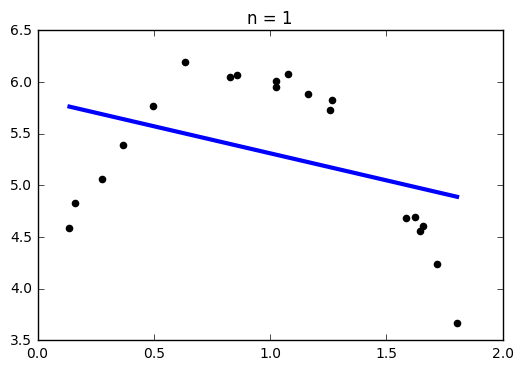

Coefficients: -0.4020
Variance score: 0.34
Residual sum of squares: 0.54
Bias: 0.350304521432
Variance: 0.18434872589


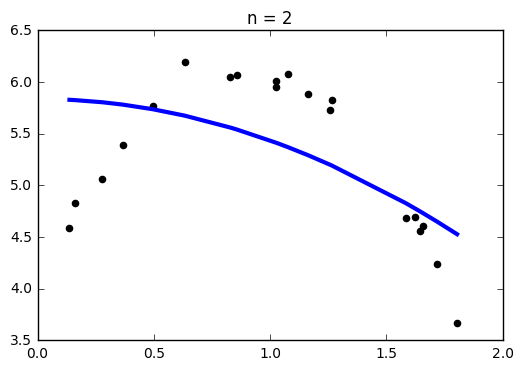

Coefficients: -0.2658
Variance score: 0.48
Residual sum of squares: 0.54
Bias: 0.272140659467
Variance: 0.262512587855


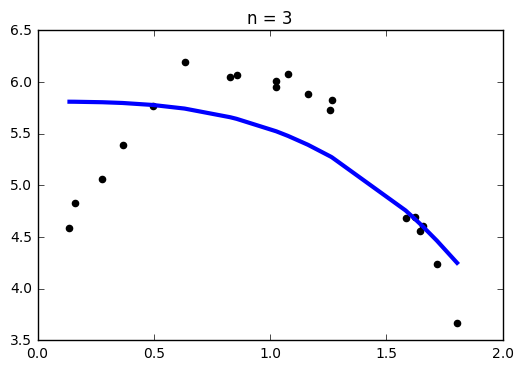

Coefficients: -0.1637
Variance score: 0.57
Residual sum of squares: 0.54
Bias: 0.224319415388
Variance: 0.310333831934


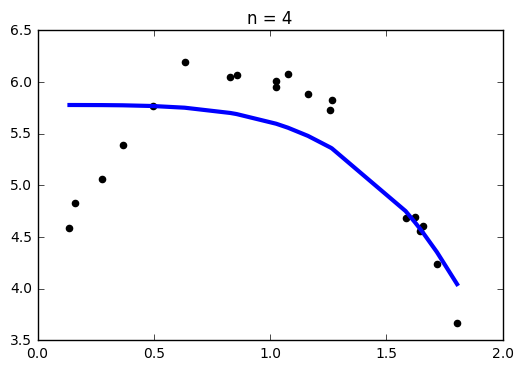

Coefficients: -0.0976
Variance score: 0.62
Residual sum of squares: 0.54
Bias: 0.196479362949
Variance: 0.338173884373


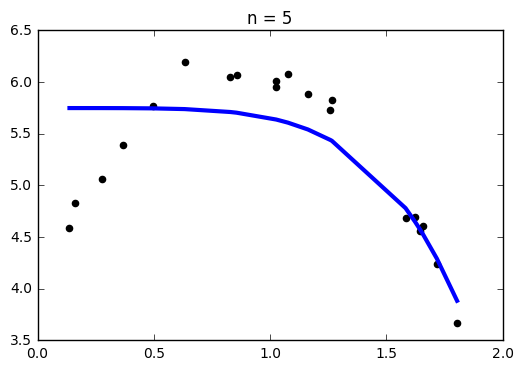

Coefficients: -0.0572
Variance score: 0.65
Residual sum of squares: 0.54
Bias: 0.180935645517
Variance: 0.353717601804


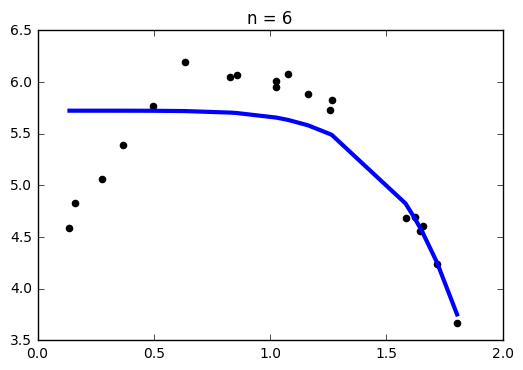

Coefficients: -0.0332
Variance score: 0.66
Residual sum of squares: 0.54
Bias: 0.173191892031
Variance: 0.361461355291


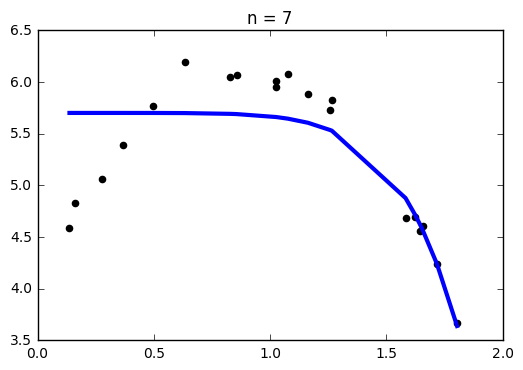

Coefficients: -0.0191
Variance score: 0.67
Residual sum of squares: 0.54
Bias: 0.17067088855
Variance: 0.363982358771


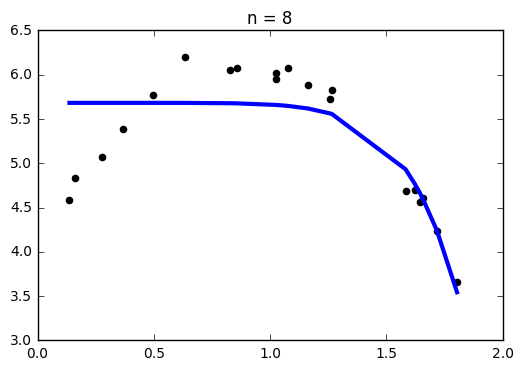

Coefficients: -0.0109
Variance score: 0.67
Residual sum of squares: 0.54
Bias: 0.171826574262
Variance: 0.36282667306


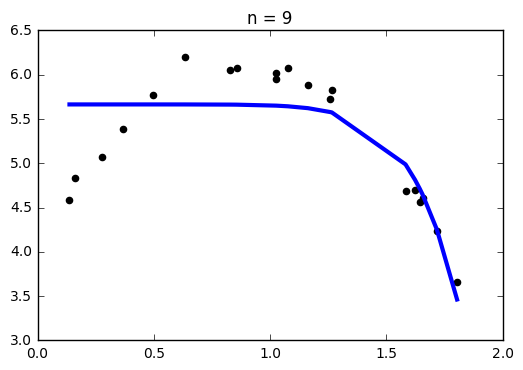

In [16]:
# Workbook code

domain = np.array([x[0] for x in data]) # The x values we're "observing"
Y = np.array([x[1] for x in data]) # The values we are trying to predict


for i in range(1, 10):
    X = monomials(domain, i) 
    # Create linear regression object and fit it to X and Y
    regr = regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print('Coefficients: %.4f' % regr.coef_)
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

It's important to **note that the true measures of bias and variance are averaged over many fits of a model to many samples from the same data source, and we're only looking at one instance here** as illustration.

The bias is at first decreasing as the exponent increases, but at $n=6$ we see the bias start to increase while the squared errors are basically unchanged. Let's make a plot of the bias as the exponent increases.

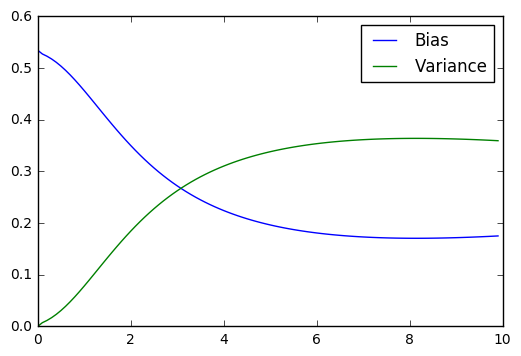

In [22]:
# Workbook code

bs = [] #list of biases
vars_ = [] #list of variances
exps = np.arange(0, 10, 0.1)

for i in exps:
    X = monomials(domain, i)
    # Create linear regression object
    regr = regr.fit(X, Y)
    
    # Calculate statistics
    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    regr = regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01

    
    bs.append(bias)
    vars_.append(var)

#Plot the variance and bias
plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars_, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Just as in the conceptual diagram from the lesson, there's a spot where the bias is minimized around $n=5$.

# Independent practice

Now let's look at some situations where adding more polynomial terms decreases both bias and variance.

# Variance

Now let's try to fit the full polynomial as the degree increases, which will help us visualize variance error.

**Check**: In the next code section, what is different from the code above?

Coefficients: -0.5234 
Variance score: 0.14
Residual sum of squares: 0.54
Bias: 0.456531427932
Variance: 0.0781218193897


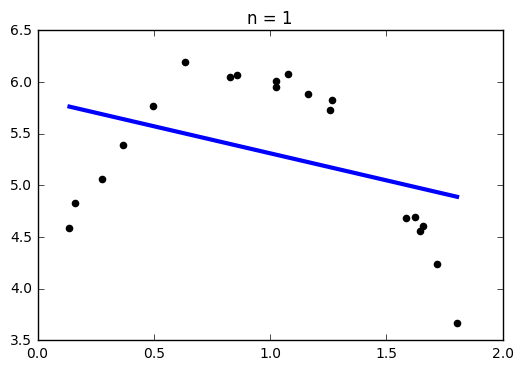

Coefficients: 4.7743 -2.7234 
Variance score: 0.98
Residual sum of squares: 0.54
Bias: -0.00170666493486
Variance: 0.536359912257


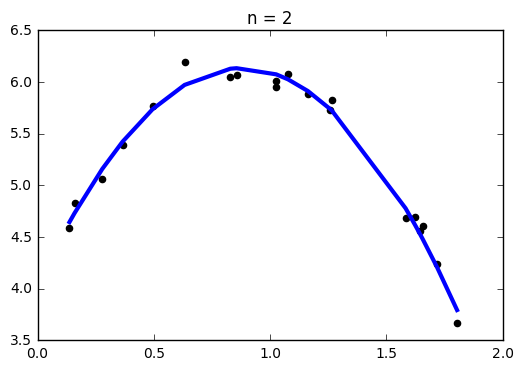

Coefficients: 4.6375 -2.5509 -0.0595 
Variance score: 0.98
Residual sum of squares: 0.54
Bias: -0.00173639512763
Variance: 0.536389642449


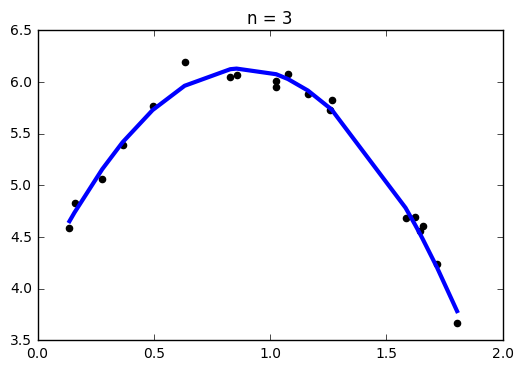

Coefficients: 6.1925 -5.8984 2.5984 -0.6979 
Variance score: 0.99
Residual sum of squares: 0.54
Bias: -0.00264081684302
Variance: 0.537294064165


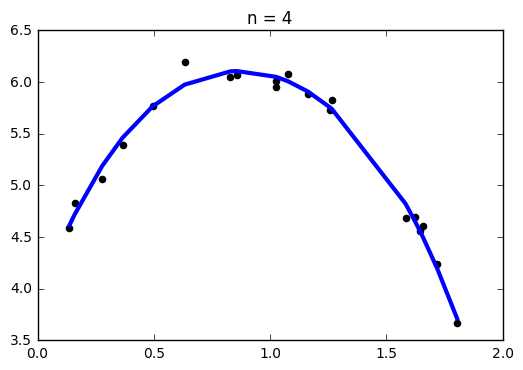

Coefficients: 3.1231 3.5518 -9.4324 6.0210 -1.3655 
Variance score: 0.99
Residual sum of squares: 0.54
Bias: -0.00331963265453
Variance: 0.537972879976


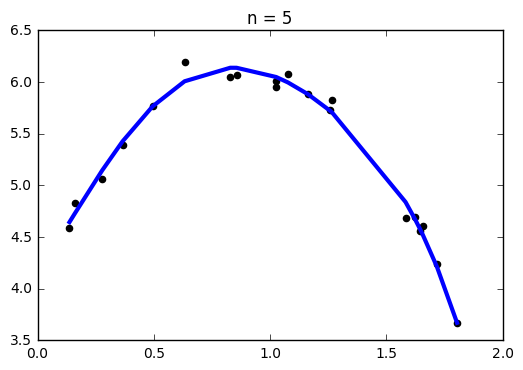

Coefficients: -5.1531 37.4076 -71.6571 62.6815 -26.3229 4.2408 
Variance score: 0.99
Residual sum of squares: 0.54
Bias: -0.00412843880457
Variance: 0.538781686126


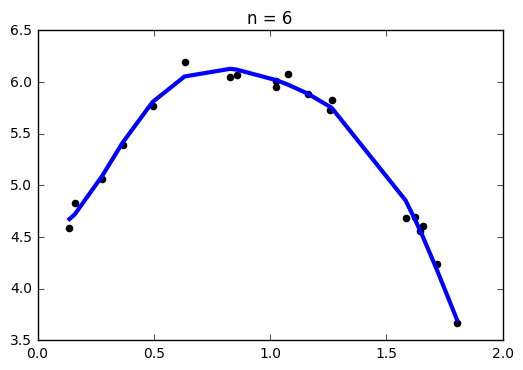

Coefficients: -18.4021 104.9763 -236.9435 278.7749 -180.8212 61.1177 -8.4231 
Variance score: 0.99
Residual sum of squares: 0.54
Bias: -0.00456558731443
Variance: 0.539218834636


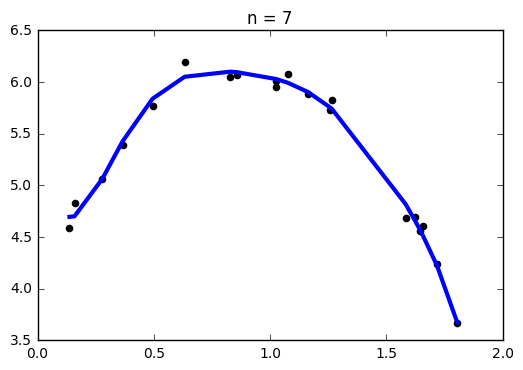

Coefficients: 41.1266 -249.3010 820.7629 -1496.2437 1567.0841 -939.9716 299.9913 -39.4831 
Variance score: 0.99
Residual sum of squares: 0.54
Bias: -0.00656604280249
Variance: 0.541219290124


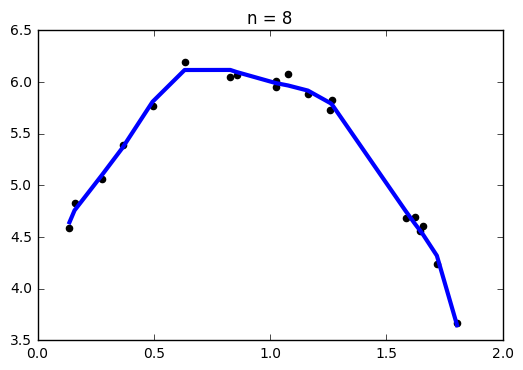

Coefficients: 129.8735 -861.1007 3014.2722 -6082.0730 7450.1402 -5627.8495 2559.8402 -642.4327 68.3017 
Variance score: 1.00
Residual sum of squares: 0.54
Bias: -0.00754798295803
Variance: 0.54220123028


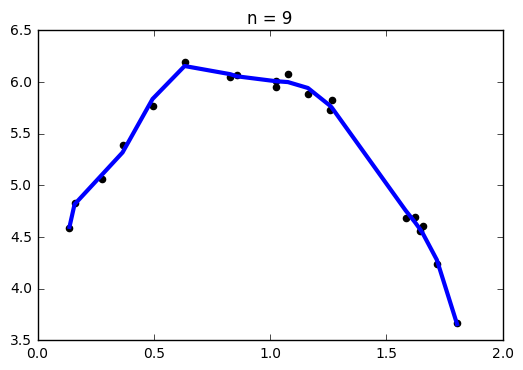

In [20]:
domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    X = polynomials(domain, i)
    # Create linear regression object
    #regr = 

    #yhat = 
    #sse = 
    #var = 
    #bias = 
    
    regr = regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    
    # The coefficients
    print 'Coefficients:',
    for b in ['%.4f' % b for b in regr.coef_]: print b,
    # Explained variance score: 1 is perfect prediction
    print('\nVariance score: %.2f' % regr.score(X, Y))

    # The mean square error
    print("Residual sum of squares: %.2f" % sse)

    print("Bias: {bias}".format(bias=bias))
    print("Variance: {var}".format(var=var))
        
    # Plot outputs
    plt.scatter(domain, Y,  color='black')
    plt.plot(domain, regr.predict(X), color='blue', linewidth=3)

    plt.title("n = " + str(i))

    plt.show()

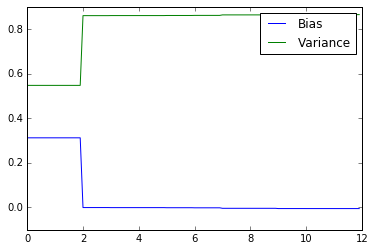

In [46]:
bs = []
vars = []
exps = np.arange(0, 12, .1)

for i in exps:
    X = polynomials(domain, i)
    # Create linear regression object
    regr = linear_model.LinearRegression()
    regr.fit(X, Y)

    yhat = regr.predict(X)
    sse = np.mean((np.mean(yhat) - Y) ** 2)
    var = np.var(yhat)
    bias = sse - var - 0.01
    bs.append(bias)
    vars.append(var)

plt.plot(exps, bs, label="Bias")
plt.plot(exps, vars, label="Variance")
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels)

plt.show()

Notice that the fits for $n = 2, 3, 4$ are pretty good. As the exponent increases, the best fit curve is overfitting the dataset, and the shape of the curve does not reflect what we know the underlying data to really look like. In this case we have error due to variance -- with too many parameters, our model is fitting the random variations in the data which we generally want to avoid.

In [ ]:
for i in range(1, 7):
    # Generate some data
    f = lambda x: 1 - 2 * x + 3 * x ** i + np.random.normal(mu, sigma)
    data = generate_data(f, 0, 2, n=20)

    domain = np.array([x[0] for x in data])
    Y = np.array([x[1] for x in data])

    X = np.array([domain]).transpose()
    # Create linear regression object
   
    # Computer the errors

    # Plot outputs

# Advanced exercises (optional)

Some functions, like $sin$ and $exp$ can be better fit with increasing large polynomials.

* By modifying the above code, fit polynomials of degree $n$ as $n$ ranges from 1 to 10 to $sin$ on the interval $[0, 2 \pi]$.
* Can you explain why the bias and variance continue to decrease as $n$ gets large?

In [ ]:
import math
f = lambda x: math.sin(x) + np.random.normal(mu, sigma)
data = generate_data(f, 0, 2*3.14, n=100)

domain = np.array([x[0] for x in data])
Y = np.array([x[1] for x in data])

for i in range(1, 10):
    pass
    # Fit a polynomial of degree i to the data
    
    # Compute the errors

    # Plot outputs

### Repeat the same exercise with the function

$$ y = e^x $$

You should again find that larger polynomials fit the data better.


### A bad model for the exponential

To see a model with high variance, try fitting the model:

```
y = a sin(x) + b cos(x)
```

to `y = e^x`. Does this model have more bias or variance?